<a href="https://colab.research.google.com/github/sabrinavdr/First/blob/main/Spatial_and_Frequency_Domain_in_Image_Processingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps ,  ImageFilter
import matplotlib.pyplot as plt
import cv2
import numpy
import numpy as np
import math
import os
from PIL import Image

from imageio import imread
from google.colab.patches import cv2_imshow

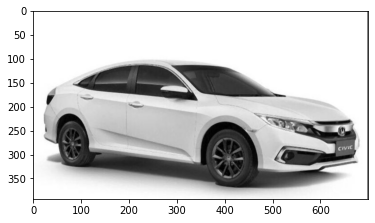

In [2]:
#Smoothing Image Using Median Filtering


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("/content/civic.jpg").convert("L")
  
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3) 
    img1 = Image.fromarray(removed_noise)
    plt.imshow(img1)
    img.show()
 


main()

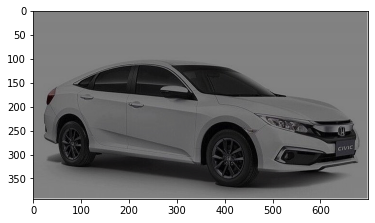

In [3]:
#Sharpening Image in Spatial Filtering Using First Order and Second Order Derivative



filter1=1.1
filter2=-0.1


def sharpen2(photo,height,width,filter1,filter2):
    for y in range(1,height-1):
        for x in range(1,width-1):

            (r,g,b)=photo.getpixel((x,y))
            r=int(r*filter1)
            g=int(g*filter1)
            b=int(b*filter1)

            (r1,g1,b1)=photo.getpixel((x-1,y-1))
            r1=int(r1*filter2)
            g1=int(g1*filter2)
            b1=int(b1*filter2)

            (r2,g2,b2)=photo.getpixel((x,y-1))
            r2=int(r2*filter2)
            g2=int(g2*filter2)
            b2=int(b2*filter2)

            (r3,g3,b3)=photo.getpixel((x+1,y-1))
            r3=int(r3*filter2)
            g3=int(g3*filter2)
            b3=int(b3*filter2)

            (r4,g4,b4)=photo.getpixel((x-1,y))
            r4=int(r4*filter2)
            g4=int(g4*filter2)
            b4=int(b4*filter2)

            (r5,g5,b5)=photo.getpixel((x+1,y))
            r5=int(r5*filter2)
            g5=int(g5*filter2)
            b5=int(b5*filter2)

            (r6,g6,b6)=photo.getpixel((x-1,y+1))
            r6=int(r6*filter2)
            g6=int(g6*filter2)
            b6=int(b6*filter2)

            (r7,g7,b7)=photo.getpixel((x,y+1))
            r7=int(r7*filter2)
            g7=int(g7*filter2)
            b7=int(b7*filter2)

            (r8,g8,b8)=photo.getpixel((x+1,y+1))
            r8=int(r8*filter2)
            g8=int(g8*filter2)
            b8=int(b8*filter2)

            rfPixel=r+r1+r2+r3+r4+r5+r6+r7+r8
            if rfPixel>255:
                rfPixel=255
            elif rfPixel<0:
                rfPixel=0

            gfPixel= g+g1+g2+g3+g4+g5+g6+g7+g8
            if gfPixel>255:
                gfPixel=255
            elif gfPixel<0:
                gfPixel=0

            bfPixel=b+b1+b2+b3+b4+b5+b6+b7+b8
            if bfPixel>255:
                bfPixel=255
            elif bfPixel<0:
                bfPixel=0

            photo.putpixel((x,y),(rfPixel,gfPixel,bfPixel))    
    return photo


photo=Image.open("/content/civic.jpg").convert("RGB")
photo2=photo.copy()
height=photo.height
width=photo.width
x=sharpen2(photo,height,width,filter1,filter2)



plt.imshow(x)

In [6]:
#High Filter in Frequency Domain using Gaussian method

def GaussianHighFilter(image,d):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    s1 = np.log(np.abs(fshift))

    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))  #calculate distance from center point
                transfor_matrix[i,j] = 1-np.exp(-(dis**2)/(2*(d**2)))
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img




img_h1 =GaussianHighFilter(img,10)
mg_h1 =GaussianHighFilter(img,30)
mg_h1 =GaussianHighFilter(img,50)

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)


plt.subplot(131)

plt.title('High 10')
plt.imshow(img_h1,cmap="gray")


plt.subplot(132)

plt.title('High 30')
plt.imshow(img_h2,cmap="gray")

plt.subplot(133)

plt.title("High 50")
plt.imshow(img_h3,cmap="gray")

plt.show()

NameError: ignored

In [ ]:
#Low Filter in Frequency Domain using Gaussian method



def GaussianLowFilter(image,d):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    s1 = np.log(np.abs(fshift))

    def make_transform_matrix(d):
        transfor_matrix = np.zeros(image.shape)
        center_point = tuple(map(lambda x:(x-1)/2,s1.shape))
        for i in range(transfor_matrix.shape[0]):
            for j in range(transfor_matrix.shape[1]):
                def cal_distance(pa,pb):
                    from math import sqrt
                    dis = sqrt((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)
                    return dis
                dis = cal_distance(center_point,(i,j))
                transfor_matrix[i,j] = np.exp(-(dis**2)/(2*(d**2)))
        return transfor_matrix
    d_matrix = make_transform_matrix(d)
    new_img = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift*d_matrix)))
    return new_img


img_l1 = GaussianLowFilter(img,10)
img_l2 = GaussianLowFilter(img,30)
img_l3 = GaussianLowFilter(img,60)


fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)


plt.subplot(131)

plt.title('Low 10')
ax.imshow(img_l1,cmap="gray")


plt.subplot(132)

plt.title('low 30')
plt.imshow(img_l2,cmap="gray")

plt.subplot(133)

plt.title("Low 60")
plt.imshow(img_l3,cmap="gray")
plt.show()